# **Importing libraries and Dataset**

In [105]:
# importing libraries
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Importing Dataset with pandas
df = pd.read_csv('Telco Customer Churn.csv')
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


# **Exploratory Analysis of Dataset**

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


***.info()*** shows that most of the data columns are of object type, with no missing values

In [107]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


***.info()*** and ***.describe()*** shows the ***TotalCharges column*** as ***object*** instead of ***floats***. So i'm investigating futher to understand the reason and make necessary correction.



In [108]:
df.TotalCharges.value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

From the above, it shows that there is one **' '** blank value, which has occurred 11 times; making the data type as object instead of **float64**

In [109]:
# viewing rows with total Charges as blank(' ')

df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [110]:
# Replacing the TotalCharges column blanks with with corresponding Monthly charges column values

# Print indexes values where variable TotalCharges == ''
print("Before removing blank values")
print(df[df['TotalCharges'] == ' '].index)

df['TotalCharges'] = np.where(df['TotalCharges'] == ' ', df['MonthlyCharges'], df['TotalCharges'])

# Print indexes values where variable TotalCharges == '' after replacing
print()
print("After removing full blank values")
print(df[df['TotalCharges'] == ' '].index)

Before removing blank values
Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

After removing full blank values
Int64Index([], dtype='int64')


In [111]:
df[df['TotalCharges'] == df['MonthlyCharges']]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,19.85,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.7,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35,No


In [112]:
# checking data type after replacing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [113]:
# Changing the data type of variable 'Totalcharges' to float64

df['TotalCharges'] = df['TotalCharges'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Now i will divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24**

In [114]:
# Get the max tenure
print(df['tenure'].max())

72


In [115]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

In [116]:
df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

**The data type issue is resolve, i'm proceeding to check the churn count for balance to know if the data model accuracy can be use to measure the model performance**

In [117]:
#churn count
churn_counts = df['Churn'].value_counts().reset_index()
churn_counts

,index,Churn
0,No,5174
1,Yes,1869


In [118]:
# Visuliazing the churn count

fig = px.bar(churn_counts, x='index', y='Churn', labels={'Churn': 'Churn', 'Count': 'Count'}, color='Churn',
             title='Churn Counts')
fig.update_layout(xaxis_title="Churn", yaxis_title="Count")
fig.show()

**The data is clearly imbalanced (More data of non-churners)**

As Data is imbalanced, i shouldn't consider the "Accuracy" in measuring the performance of the model. Accuracy will give wrong measure, to solve this i will have to balance the data before training my model in the model building section

# ***Data Analysis and Visualization***

1. How gender, partner and dependents are related to churn?

In [119]:
# The count for each churn categories in this path
churn_categories = df.groupby(['gender', 'Partner', 'Dependents', 'Churn']).size().reset_index(name='Count')
churn_categories_sorted = churn_categories.sort_values(by=['Dependents', 'Partner'])
churn_categories_sorted

,gender,Partner,Dependents,Churn,Count
0,Female,No,No,No,1068
1,Female,No,No,Yes,587
8,Male,No,No,No,1089
9,Male,No,No,Yes,536
4,Female,Yes,No,No,618
5,Female,Yes,No,Yes,187
12,Male,Yes,No,No,615
13,Male,Yes,No,Yes,233
2,Female,No,Yes,No,112
3,Female,No,Yes,Yes,33


From the above i observe that customers without a partner or a dependents, either male or female are more likely to churn.

2. Does tenure has any impact on churn?

In [120]:
df.groupby(['tenure', 'Churn']).size().reset_index(name='count')

,tenure,Churn,count
0,0,No,11
1,1,No,233
2,1,Yes,380
3,2,No,115
4,2,Yes,123
...,...,...,...
140,70,Yes,11
141,71,No,164
142,71,Yes,6
143,72,No,356


In [121]:
fig = px.histogram(df.groupby(['tenure', 'Churn']).size().reset_index(name='count'),
                   x="tenure", y="count", color="Churn", marginal="rug", color_discrete_map={"Yes":"#E45756", "No":"#1CBE4F"},
                   title="Tenure impact on churn?")

fig.show()

This shows that as the customer tenure turns old, most get habituated using same telecom service

3. Effect on phone and internet services to churn

In [122]:
ph_int_service = df.groupby(['Churn', 'PhoneService', 'InternetService']).size().reset_index(name='count')
ph_int_service

,Churn,PhoneService,InternetService,count
0,No,No,DSL,512
1,No,Yes,DSL,1450
2,No,Yes,Fiber optic,1799
3,No,Yes,No,1413
4,Yes,No,DSL,170
5,Yes,Yes,DSL,289
6,Yes,Yes,Fiber optic,1297
7,Yes,Yes,No,113


In [123]:
fig = px.bar(ph_int_service,
             x=['Churn', 'PhoneService', 'InternetService'],
             y='count',
             title='Effect on phone and internet services to churn',
             labels={'count': 'Count', 'x': 'Service'})
fig.show()

The above indicated that customer with Phone services (yes) and 'Fiber optic' Internet Service are churning

4. Impact of Tech support on churn

In [124]:
np.unique(df.TechSupport)

array(['No', 'No internet service', 'Yes'], dtype=object)

In [125]:
# Let me take only "Yes" and "No" for TechSupport in consideration
data_techSupport_yes = df[df['TechSupport'] == 'Yes']
data_techSupport_no = df[df['TechSupport'] == 'No']

Customers who took tech support

In [126]:
data_techSupport_yes.groupby(['tenure', 'Churn']).size()

tenure  Churn
0       No         4
1       No        19
        Yes       14
2       No         8
        Yes       11
                ... 
70      Yes        8
71      No        89
        Yes        2
72      No       221
        Yes        3
Length: 141, dtype: int64

In [127]:
fig = px.histogram(data_techSupport_yes.groupby(['tenure', 'Churn']).size().reset_index(name='count'),
                   x="tenure", y="count", marginal="rug", color="Churn", color_discrete_map={"Yes":"#E45756", "No":"#1CBE4F"},
                   title="Statistics of customers opted for tech support with churning")
fig.show()

Customers who didn't took tech support

In [128]:
data_techSupport_no.groupby(['tenure', 'Churn']).size()

tenure  Churn
0       No         1
1       No       106
        Yes      308
2       No        66
        Yes      106
                ... 
70      Yes        3
71      No        34
        Yes        4
72      No        69
        Yes        3
Length: 145, dtype: int64

In [129]:
fig = px.histogram(data_techSupport_no.groupby(['tenure', 'Churn']).size().reset_index(name='count'),
                   x='tenure', y='count',color='Churn', marginal='rug', color_discrete_map={"Yes":"#E45756", "No":"#1CBE4F"},
                   title="Statistics of customers opted for tech support with churning")

fig.show()

5. Relationship of churn with monthly charges or total charges?

In [130]:
fig = px.histogram(df, x="MonthlyCharges", color="Churn", barmode="overlay", title="Relationship of churn with monthly charges")
fig.update_layout(bargap=0.1)
fig.show()

As the monthy charges are incresing, we can see the density increasing too (60-120), which means more churning with increasing monthly charges

In [131]:
fig = px.histogram(df, x="TotalCharges", color="Churn", barmode="overlay", title="Relationship of churn with Total charges")
fig.update_layout(bargap=0.1)
fig.show()

**Analysis Observation**

*   Analysis 1: Whether male or female, if they do not have partner or
dependents, they are more likely to churn!!

*   Analysis 2: During 0-10 years of tenure, we can see maximum churning. As the customer turns old, they might get habituated using same telecom service

*   Analysis 3: People with Phone services (yes) and 'Fiber optic' Internet Service are churning more

*   Analysis 4:more churning takes place in first 10 yrs, for customers with or without tech support. But Churning is more in case of "without tech support" customers

*   Analysis 5: As the monthy charges are incresing, we can see the density increasing too (60-120), which means more churning with increasing monthly charges

# **Data Pre-processing**

In [132]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [133]:
# drop customer ID column

df.drop(columns= ['customerID', 'tenure'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [134]:
# Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

df['Churn'] = np.where(df.Churn == 'Yes',1,0)

In [135]:
df_dummies = pd.get_dummies(df).astype(int)
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29,29,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53,108,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42,1840,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70,151,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [136]:
# Splitting data into dependent and indendent variables
x = df_dummies.drop(['Churn'], axis=1)
y = df_dummies.Churn

In [137]:
x.head(2)

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29,29,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [138]:
y.head(2)

0    0
1    0
Name: Churn, dtype: int64

**Feature Scaling - MinMax Scaler**

In [139]:
# Convert all columns to float data type
x = x.astype(float)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

# Create a DataFrame with scaled data
X = pd.DataFrame(X_scaled, columns=x.columns)

In [140]:
X.head(2)

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0.0,0.11,0.001269,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.38,0.215901,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [141]:
# concat X and y together

new_data = pd.concat([X, y], axis=1)
new_data

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72,Churn
0,0.0,0.11,0.001269,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.38,0.215901,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.0,0.35,0.010385,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.24,0.210247,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.0,0.52,0.015347,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.66,0.227556,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
7039,0.0,0.85,0.847450,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
7040,0.0,0.11,0.037849,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
7041,1.0,0.56,0.033233,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [142]:
# Saving Pre-processed data
new_data.to_csv('cust_churn_preprossed_data.csv', index=False)

# **MODEL BUILDING**

**Dealing with data imbalance**

In [143]:
import pandas as pd
import numpy as np
from imblearn.combine import SMOTEENN
sm = SMOTEENN(random_state = 42)

df = pd.read_csv('cust_churn_pre.csv')

X = df.drop(['Churn'], axis=1)
y = df.Churn

X_resample, y_resample = sm.fit_resample(X, y)

In [144]:
print(X.shape)
print(X_resample.shape)

(7043, 50)
(6289, 50)


In [145]:
print(np.unique(y, return_counts=True))
print(np.unique(y_resample, return_counts=True))

(array([0, 1]), array([5174, 1869]))
(array([0, 1]), array([2691, 3598]))


In [146]:
cols = X_resample.columns # keeping the names of all columns

from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X_resample)
X_resample_scaled = pd.DataFrame(x_scaled, columns=cols)

**Now that my data is balance i can now use the model accuracy to predict the performance of my model**

**Data Spliting**

In [147]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_resample_scaled,y_resample, test_size = 0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5031, 50)
(1258, 50)
(5031,)
(1258,)


**Train and Evaluate a Logistic Regression model**

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,  accuracy_score

log_model = LogisticRegression(solver='liblinear',C=10.0, random_state = 42)
log_model.fit(x_train,y_train)
predictions = log_model.predict(x_test)

print(classification_report(y_test,predictions))
print("Prediction label:", predictions)
print("Accuracy:", accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       539
           1       0.90      0.94      0.92       719

    accuracy                           0.91      1258
   macro avg       0.91      0.90      0.90      1258
weighted avg       0.91      0.91      0.90      1258

Prediction label: [1 1 1 ... 0 1 0]
Accuracy: 0.9054054054054054


**Train and Evaluate a Random Forest Classifier model**

In [149]:
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import classification_report,  accuracy_score

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier.fit(x_train, y_train)
rn_predictions = classifier.predict(x_test)

print(classification_report(y_test,rn_predictions))
print("Prediction label:", rn_predictions)
print("Accuracy:", accuracy_score(y_test,rn_predictions))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       539
           1       0.96      0.96      0.96       719

    accuracy                           0.95      1258
   macro avg       0.95      0.95      0.95      1258
weighted avg       0.95      0.95      0.95      1258

Prediction label: [1 1 1 ... 0 1 0]
Accuracy: 0.9538950715421304


**Train and Evaluate a K-Nearest Neighbor model**

In [150]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,  accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn_predictions = knn.predict(x_test)

print(classification_report(y_test,knn_predictions))
print("Prediction label:", knn_predictions)
print("Accuracy:", accuracy_score(y_test,knn_predictions))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       539
           1       0.91      0.99      0.95       719

    accuracy                           0.94      1258
   macro avg       0.95      0.93      0.94      1258
weighted avg       0.94      0.94      0.94      1258

Prediction label: [1 1 1 ... 0 1 0]
Accuracy: 0.9379968203497615


**Train and Evaluate a Naive Bayes Classifier model**

In [151]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,  accuracy_score

nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

nb_predictions = nb_classifier.predict(x_test)

print(classification_report(y_test, nb_predictions))
print("Prediction label:", nb_predictions)
print("Accuracy:", accuracy_score(y_test, nb_predictions))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       539
           1       0.88      0.93      0.90       719

    accuracy                           0.89      1258
   macro avg       0.89      0.88      0.88      1258
weighted avg       0.89      0.89      0.89      1258

Prediction label: [1 1 1 ... 0 1 0]
Accuracy: 0.8879173290937997


**Compare the trained models by calculating AUC score and plot ROC curve**

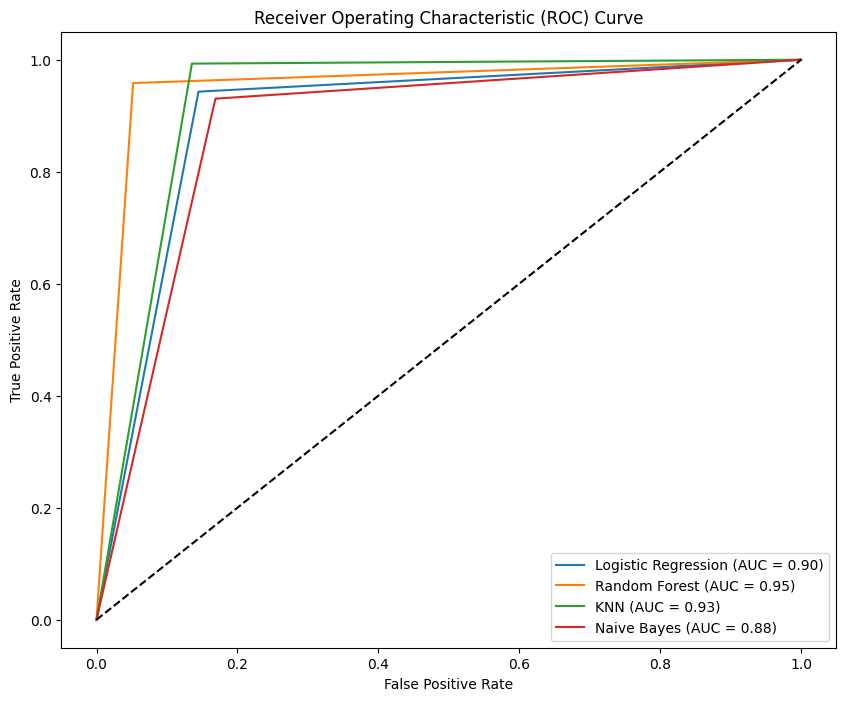

In [152]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

classifiers = [log_model, classifier, knn, nb_classifier]
predictions = [predictions, rn_predictions, knn_predictions, nb_predictions]
labels = ['Logistic Regression', 'Random Forest', 'KNN', 'Naive Bayes']

auc_scores = []
roc_curves = []

for clf, pred in zip(classifiers, predictions):
    auc_score = roc_auc_score(y_test, pred)
    auc_scores.append(auc_score)
    fpr, tpr, _ = roc_curve(y_test, pred)
    roc_curves.append((fpr, tpr))

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i, (fpr, tpr) in enumerate(roc_curves):
    plt.plot(fpr, tpr, label=f'{labels[i]} (AUC = {auc_scores[i]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


**From the above AUC score and ROC curve, it obersvable that the best performing model is the RandomForestClassifier model.**

**Saving the best performing model (RandomForest) as pickle**

In [153]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(classifier, file)

**Open our saved pickle file**

In [161]:
load_model = pickle.load(open('model.pkl', 'rb'))
load_model

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [162]:
model_score = load_model.score(x_test, y_test)
model_score

0.9538950715421304